In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from scipy.linalg import svd
random.seed(0)
#from numpy.random import default_rng
#rng = default_rng()

In [2]:
# Functions
# The walker remains inside the grid
def cond(x, size):
    return (x >= 0) and (x < size)
#cond = lambda x : (x >= 0) and (x < size)

def matrixConstructor(p, size):
    """ At any step the memory matrix is updated"""
    mtx = np.zeros((size,size), dtype=float)
    mtx[p] = 1
    counter = 1
    q = p
    pool = neighboring(q,mtx,size)
    while len(pool) > 0:
        for q in pool: mtx[q] = -1
        q = random.choice(pool)
        #q = pool[rng.integers(len(pool))]
        mtx[q] = 1
        pool = neighboring(q,mtx,size)
        counter += 1
    return (mtx, counter/np.sqrt(size))

def neighboring(entry, mtx, size):
    """  It defines de neighboring points $N(p_t)$ of an entry $p_t$. 
    The memory matrix mtx must vanishes at any entry corresponding to a 
    neighboring point """

    i, j = entry[0], entry[1]
    pool = [(i-1,j), (i+1,j), (i,j-1), (i,j+1)]
    return [q for q in pool if cond(q[0],size) and cond(q[1],size) and mtx[q]==0]

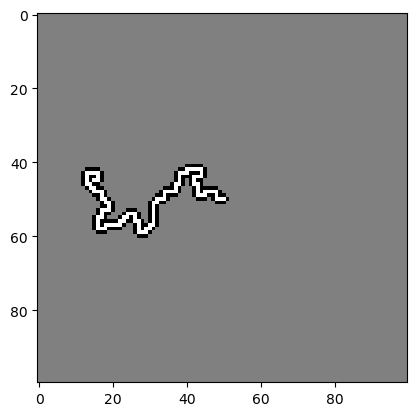

In [13]:
matrixSize = 1000
p = (random.choice(range(matrixSize)),random.choice(range(matrixSize)))
mtx = matrixConstructor(p, matrixSize)[0]

lw = 50
plt.imshow(mtx[p[0]-np.min([p[0],lw]):p[0]+np.min([matrixSize-p[0],lw]),p[1]-np.min([p[1],lw]):p[1]+np.min([matrixSize-p[1],lw])], cmap='gray', vmin=-1, vmax=1)

In [14]:
matrixSize = 1000
samplingSize = 2000

t = time.time()
lvnT = [matrixConstructor((random.choice(range(matrixSize)),random.choice(range(matrixSize))), matrixSize)[1] for k in range(samplingSize)]
print(f"{time.time() - t:e}")

2.261147e+00


In [15]:
from scipy.stats import chi2

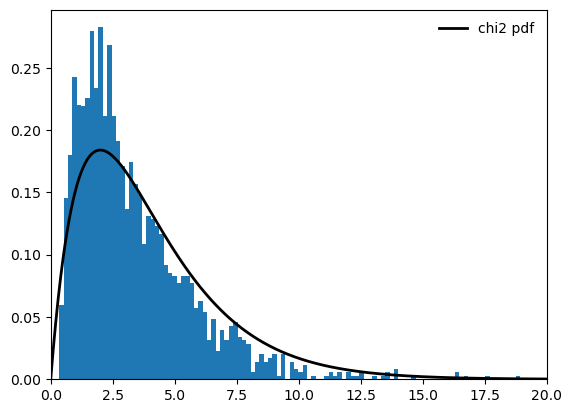

In [16]:
rv = chi2(4)
x = np.linspace(0, 20, 1000)
plt.hist(lvnT, bins = 120, density=True)
plt.xlim(0, 20)
plt.plot(x, rv.pdf(x), 'k-', lw=2,  label='chi2 pdf')
#plt.grid(True)
plt.legend(loc='best', frameon=False)
plt.show()

In [17]:
def samplingEV(samplingSize, matrixSize):
    
    evs = []
    for i in range(samplingSize):
        A = matrixConstructor((random.choice(range(matrixSize)),random.choice(range(matrixSize))), matrixSize)[0]
        evs = np.concatenate([evs,np.linalg.svd(np.matmul(A,np.transpose(A)), full_matrices=False, compute_uv=False)])        
    t = time.time()   
    eigenvalues = []
    for i in range(matrixSize):
        ev = evs[i:matrixSize*samplingSize:matrixSize]
        eigenvalues.append(np.mean(ev))
    print(f"{time.time() - t:e}")     
    return np.array(eigenvalues)

In [8]:
matrixSize = 1000
samplingSize = 200

#t = time.time()
eigenvalues = samplingEV(samplingSize, matrixSize)
#print(f"{time.time() - t:e}")

1.910067e-02


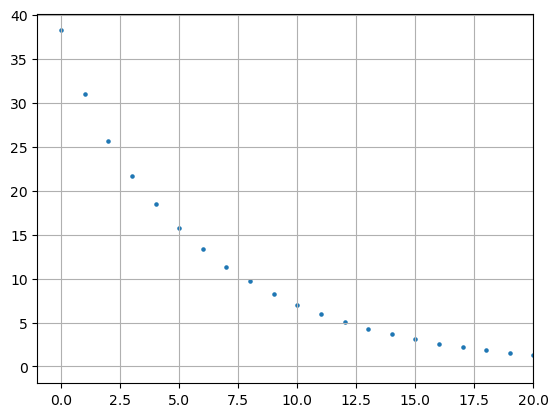

[38.21482826 31.03164991 25.67050047 21.68993566 18.48479602]
0.0


In [9]:
xx = range(len(eigenvalues))
plt.scatter(xx, eigenvalues, s = 5.1)
plt.xlim(-1, 20)
plt.grid(True)
plt.show()

print(eigenvalues[:5])
print(eigenvalues[-1])

In [10]:
EVS = np.zeros(10,dtype=float)
print(EVS)
evs = np.ones(3,dtype=float)
EVS[0:3] = evs[:]
print(EVS)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
